In [1]:
import numpy as np
import matplotlib.pyplot as plt

dtrain123 = np.loadtxt("data/dtrain123.dat")
twomoons = np.loadtxt("data/twomoons.dat")

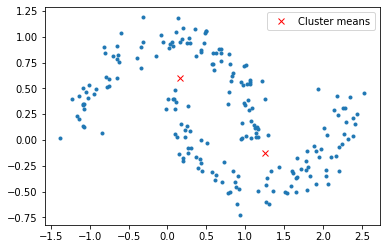

In [2]:
#plotting the cluster means
plt.plot(twomoons[:, 1], twomoons[:, 2], ".")
plt.plot(twomoons[twomoons[:,0] == -1][:, 1].mean(), twomoons[twomoons[:,0] ==-1][:, 2].mean(), "x", color="red")
plt.plot(twomoons[twomoons[:,0] == 1][:, 1].mean(), twomoons[twomoons[:,0] ==1][:, 2].mean(), "x", color="red", label="Cluster means")
plt.legend();

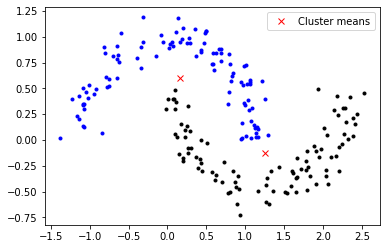

In [3]:
# plotting the cluster means
plt.plot(twomoons[twomoons[:,0] == -1][:, 1], twomoons[twomoons[:,0] ==-1][:, 2], ".", color="black")
plt.plot(twomoons[twomoons[:,0] == 1][:, 1], twomoons[twomoons[:,0] ==1][:, 2], ".", color="blue")
plt.plot(twomoons[twomoons[:,0] == -1][:, 1].mean(), twomoons[twomoons[:,0] ==-1][:, 2].mean(), "x", color="red")
plt.plot(twomoons[twomoons[:,0] == 1][:, 1].mean(), twomoons[twomoons[:,0] ==1][:, 2].mean(), "x", color="red", label="Cluster means")
plt.legend();

In [4]:
def make_it_quick(X):
    
    # we compute the kernel of norms only once per loop
    Kdif = np.eye(X.shape[0])

    # create the kernel of squared norms of all the data vectors
    for i in range(X.shape[0]):
      for j in range(X.shape[0]):
        Kdif[i,j] = np.linalg.norm(X[i,:] - X[j,:])**2
    
    return np.exp(-Kdif)

def Laplace_matrix(K, c):

    # We can now compute the exponential kernel
    W = K**c
    
    D = np.eye(W.shape[0])
    for i in range(W.shape[0]):
        D[i, i] = np.sum(W[i, :])

    L = D - W

    l, v = np.linalg.eig(L)
    index = np.argsort(l)
    
    second_v = np.real(v[:, index[1]])
    
    return L, second_v

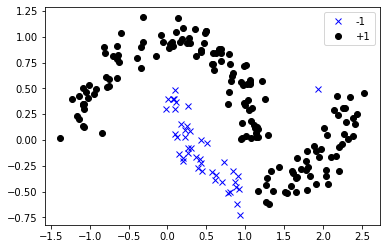

In [5]:
# twomoons spectral clustering
kernel = make_it_quick(twomoons[:,1:])
l, v_2= Laplace_matrix(kernel, 800)
labels = np.sign(v_2)
labels[labels == 0] = 1
labelled_data = np.concatenate((twomoons[:,1:], labels[:,None]), axis=1)
'''
Plotting the Data
'''
twomoons_neg = labelled_data[labelled_data[:, 2] == -1]
twomoons_pos = labelled_data[labelled_data[:, 2] == 1]

plt.plot(twomoons_neg[:, 0], twomoons_neg[:, 1], "x", c="blue", label="-1")
plt.plot(twomoons_pos[:, 0], twomoons_pos[:, 1], "o", c="black", label="+1")
plt.legend()
plt.show()


In [6]:
# now searching for the ideal c

CPlist = []
#clist = np.linspace(0, 1000, 100)
clist = [2**(i) for i in np.linspace(-10,10, 200)]
labels_real = twomoons[:, 0]
kernel = make_it_quick(twomoons[:,1:])
for c in clist:
    l, v_2 = Laplace_matrix(kernel, c)
    labels_pred = np.sign(v_2)
    labels_pred[labels_pred == 0] = 1
    
    l_plus = len(labels[labels_pred == labels_real])
    l_minus = len(labels[labels_pred != labels_real])
    
    CP = max(l_plus,l_minus)/len(labels_pred)
    CPlist.append(CP)

ideal_c = clist[np.argmax(CPlist)] # first c that satisfies best classification

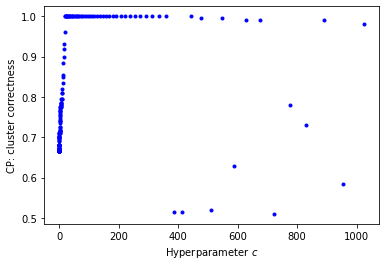

In [7]:
# plotting CP versus c
plt.plot(clist, CPlist,".", c="blue")
plt.ylabel("CP: cluster correctness")
plt.xlabel("Hyperparameter $c$");

## Question 2

In [8]:
# (A)
# we can use different seeds for different results
#np.random.seed(10)
np.random.seed(100)

# we define the gaussians
cov_neg = np.eye(2)*0.04
mean_neg = np.array([-0.3,-0.3])

x_neg, y_neg = np.random.multivariate_normal(mean_neg, cov_neg, 20).T

# (B)
cov_pos = np.eye(2)*0.01
mean_pos = np.array([0.15,0.15])

x_pos, y_pos = np.random.multivariate_normal(mean_pos, cov_pos, 20).T


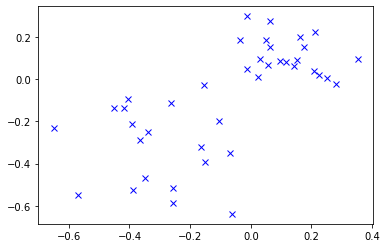

In [9]:
# plotting our data
plt.figure()
plt.plot(x_neg, y_neg,"x",c="blue")
plt.plot(x_pos, y_pos,"x",c="blue")
plt.show()

In [10]:
# merging our data into a single array

pos_data = np.concatenate((x_pos[:,None],y_pos[:,None]),axis=1)
neg_data = np.concatenate((x_neg[:,None], y_neg[:,None]),axis=1)
data = np.concatenate((neg_data, pos_data),axis=0)
data.shape # should be 40 by 2

(40, 2)

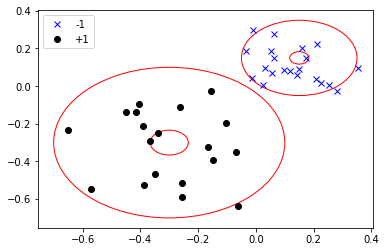

In [11]:
# we compute the laplace matrix and the eignevector
data_kernel = make_it_quick(data)
l, v_2 = Laplace_matrix(data_kernel, 90)
labels = np.sign(v_2)
labels[labels== 0] = 1
labelled_data = np.concatenate((data, labels[:,None]), axis=1)



'''
Plotting the Data with contours
'''
gauss_neg = labelled_data[labelled_data[:, 2] == -1]
gauss_pos = labelled_data[labelled_data[:, 2] == 1]

fig, ax = plt.subplots()
small_gauss = plt.Circle((0.15, 0.15), 0.2, color='red', fill=False)
small_gauss_mean = plt.Circle((0.15, 0.15), 0.033, color='red', fill=False)


big_gauss = plt.Circle((-0.3, -0.3), 0.4, color='red', fill=False)
big_gauss_mean = plt.Circle((-0.3, -0.3), 0.066, color='red', fill=False)

ax.add_patch(small_gauss)
ax.add_patch(small_gauss_mean)
ax.add_patch(big_gauss)
ax.add_patch(big_gauss_mean)

plt.plot(gauss_neg[:, 0], gauss_neg[:, 1], "x", c="blue", label="-1")
plt.plot(gauss_pos[:, 0], gauss_pos[:, 1], "o", c="black", label="+1")
plt.legend()
plt.show()

In [12]:
# now we find the optimal c

clist = [2**(i) for i in np.linspace(-10,10, 200)]     
data_kernel = make_it_quick(data)
CPlist = []

# the real labels are simply 20 -1s and 20 +1s concatenated
labels_real = np.concatenate((-1*np.ones((20,)),np.ones((20,))), axis=0)

for c in clist:
    l, v_2 = Laplace_matrix(data_kernel, c)
    labels_pred = np.sign(v_2)
    labels_pred[labels_pred== 0] = 1
    
    l_plus = len(labels[labels_pred == labels_real])
    l_minus = len(labels[labels_pred != labels_real])
    
    CP = max(l_plus,l_minus)/len(labels_pred)
    CPlist.append(CP)
    
ideal_c = clist[np.argmax(CPlist)] # first c that satisfies best classification


In [13]:
ideal_c

89.41296042113285

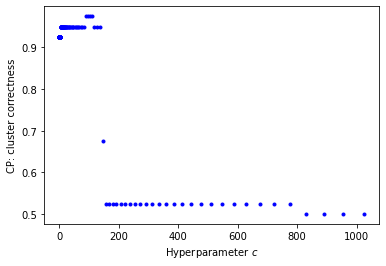

In [14]:
# plotting cp versus c
plt.plot(clist, CPlist,".", c="blue")
plt.xlabel("Hyperparameter $c$")
plt.ylabel("CP: cluster correctness");

## Question 3

In [23]:
#(A)
data1 = dtrain123[dtrain123[:,0]==1]
# we can balance the data
#data1 = dtrain123[dtrain123[:,0]==1][:70]
data3 = dtrain123[dtrain123[:,0]==3]

filtered_data = np.concatenate((data1, data3),axis=0)

# we now have features and labels separated
features = filtered_data[:,1:]
labels = filtered_data[:, 0]

# creating the class_y variable
class_y =  2*(labels==1) - 1

In [24]:
# (B)
kernel = make_it_quick(features)
l, v_2 = Laplace_matrix(kernel, 0.2822822822822823)
labels_pred = np.sign(v_2)
labels_pred[labels_pred == 0] = 1


l_plus = len(labels[labels_pred==class_y])
l_minus = len(labels[labels_pred!=class_y])
print(l_minus, l_plus)
print(max(l_plus,l_minus)/len(labels_pred))

67 123
0.6473684210526316


In [25]:
# same as above but iterating over different values
clist = np.linspace(0, 0.1, 100, endpoint=True)
CPlist = []
kernel = make_it_quick(features)
for c in clist:
    l, v_2 = Laplace_matrix(kernel, c)
    labels_pred = np.sign(v_2)
    labels_pred[labels_pred == 0] = 1

    l_plus = len(labels[labels_pred == class_y])
    l_minus = len(labels[labels_pred != class_y])
    
    CP = max(l_plus,l_minus)/len(labels_pred)
    CPlist.append(CP)


In [26]:
max(CPlist) # the peak CP value

0.9315789473684211

In [27]:
clist[np.argmax(CPlist)] # the ideal c

0.011111111111111112

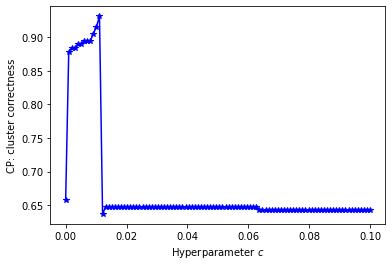

In [28]:
#plotting cp versus c
plt.plot(clist, CPlist, c="blue", marker="*")
plt.xlabel("Hyperparameter $c$")
plt.ylabel("CP: cluster correctness");

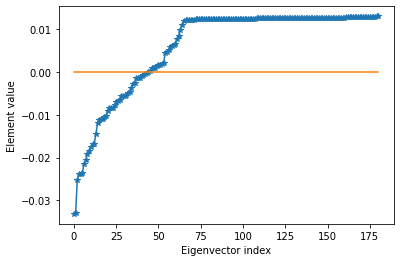

In [29]:
# plotting the index of the eigenvector
kernel = make_it_quick(features)
l, v_2 = Laplace_matrix(kernel, 0.00404040404040404)
index = np.linspace(0, 140, 140)
plt.plot(np.sort(v_2)[4:-5], marker="*")
x = np.linspace(0, 180, 180)
plt.plot(x, 0*x)
plt.xlabel("Eigenvector index")
plt.ylabel("Element value")
plt.show()

In [30]:
np.sum(v_2**2) # eigenvector is normalised

0.9999999999999999